<h1> Clustering. K-means

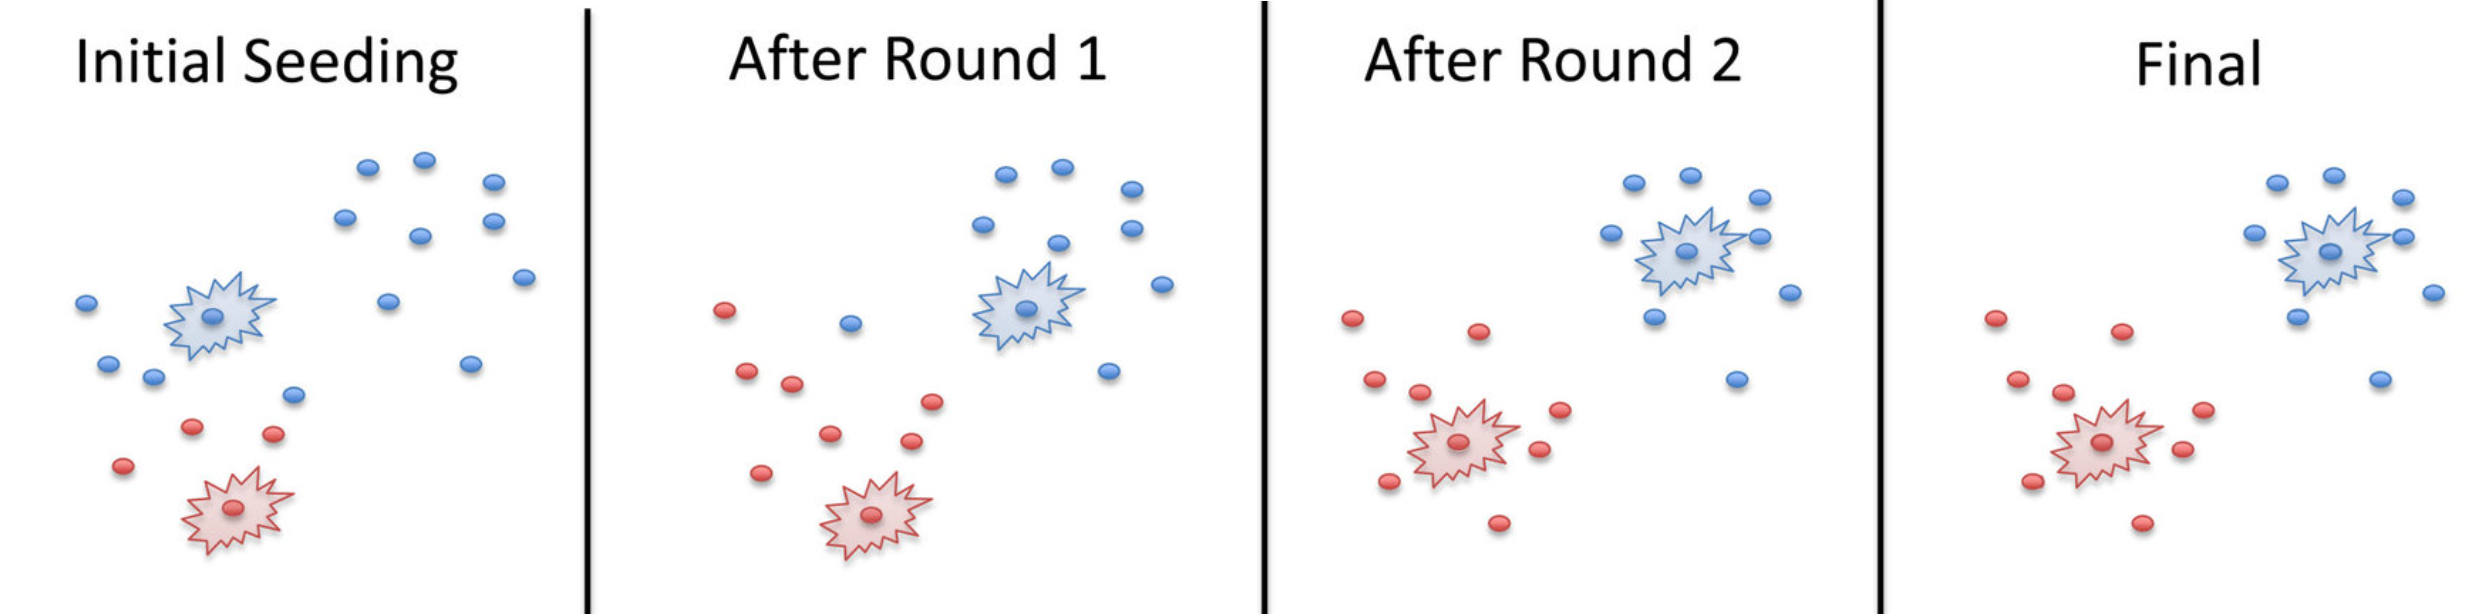

In [2]:
from IPython import display
display.Image("kmeans.png", width="1200", height="700")

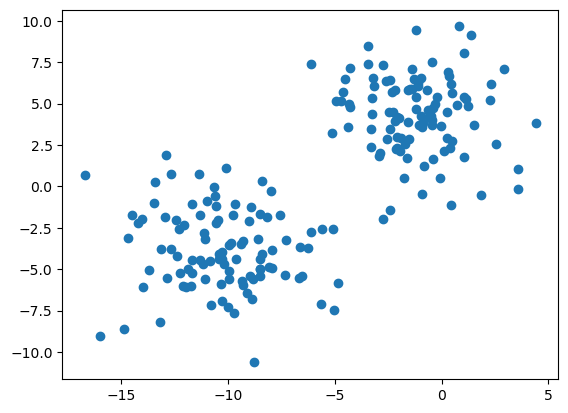

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=200, random_state=1, n_features=2, centers = 2, cluster_std = 2.4)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2) #specfify thenumber of cluster = 2
kmeans.fit(X);

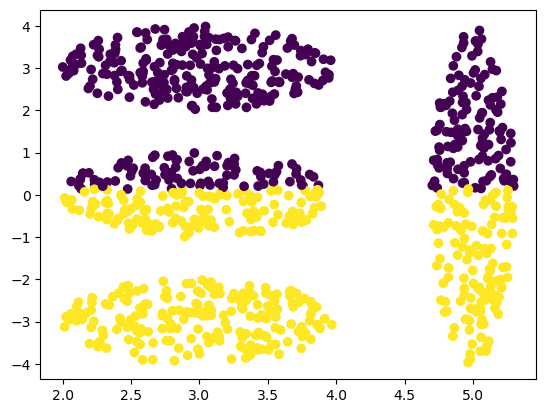

In [4]:
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)
plt.show()

In [7]:
kmeans.cluster_centers_ #where are centres localized?

array([[ -1.17963243,   4.34587916],
       [-10.27744713,  -3.83271163]])

<h4> In practice, we don't know the number of clusters...

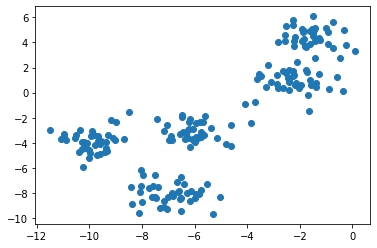

In [8]:
X, y = make_blobs(n_samples=200, random_state=1, n_features=2, centers = 5, cluster_std = 0.8)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

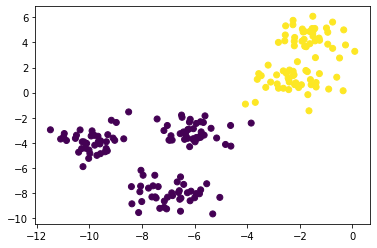

In [9]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X);
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)
plt.show()

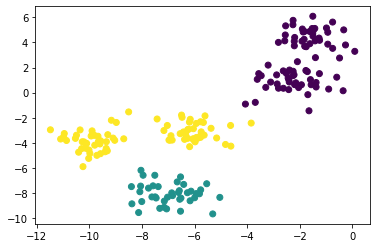

In [10]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X);
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)
plt.show()

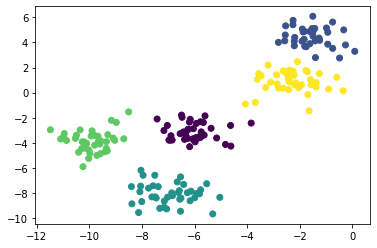

In [11]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X);
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)
plt.show()

AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) are commonly used in clustering methods as measures of model fit. They help to choose the optimal number of clusters in a given dataset by balancing the trade-off between the goodness of fit and the complexity of the model.

The basic idea is to compare the AIC or BIC values for different clustering models with varying numbers of clusters, and choose the model with the lowest value. A lower AIC or BIC value indicates a better fit with the data, while also penalizing for model complexity.


In [15]:
from sklearn.mixture import GaussianMixture

def AIC(X, k):
    gmm = GaussianMixture(n_components=k, init_params='kmeans')
    gmm.fit(X)
    return gmm.aic(X);

def BIC(X, k):
    gmm = GaussianMixture(n_components=k, init_params='kmeans')
    gmm.fit(X)
    return gmm.bic(X);

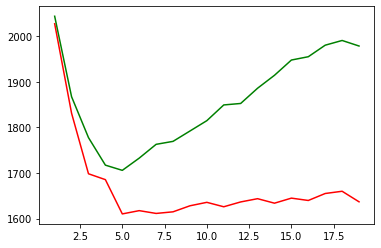

In [16]:
aic = []
bic = []

for i in range(1, 20):
    a, b = AIC(X,i), BIC(X,i)
    aic.append(a)
    bic.append(b)
    
plt.plot(range(1,20), aic, c = "red")
plt.plot(range(1,20), bic, c = "green")

plt.show()
    

<h4> Example1: Digits clustering

In [17]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape #1797 images, 8x8 size

(1797, 64)

In [18]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [19]:
kmeans = KMeans(n_clusters = 10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
print(kmeans.cluster_centers_.shape) #10 clusters 64D

(10, 64)


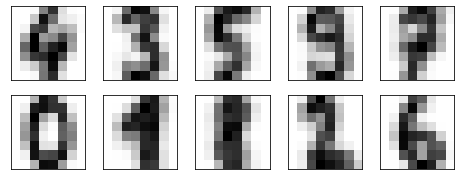

In [20]:
#how these centers looks like? Which digitis seems to be easy or difficult to classify?

fig, ax = plt.subplots(2, 5, figsize = (8,3))
centers = kmeans.cluster_centers_.reshape(10,8,8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks = [], yticks = [])
    axi.imshow(center, interpolation = "nearest", cmap = plt.cm.binary)

In [21]:
clusters == 1

array([False, False, False, ..., False, False, False])

In [22]:
#k-means names the group arbitrary (for example 1 group may not correspond to "1 digit")

from scipy.stats import mode
import numpy as np

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(digits.target, labels)

0.7935447968836951

Text(83.40000000000006, 0.5, 'predicted label')

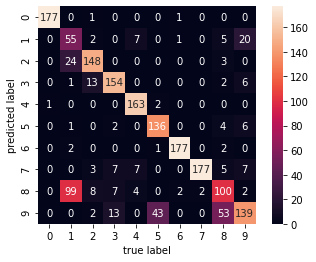

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square = True, annot = True, fmt = "d", cbar = True,
            xticklabels = digits.target_names,
            yticklabels = digits.target_names)

plt.xlabel("true label")
plt.ylabel("predicted label")
            

<h4> Example2: Image compression

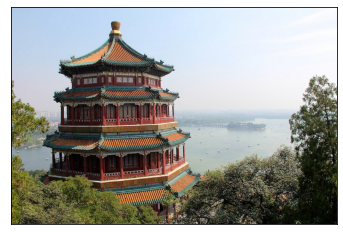

In [25]:
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg")
ax = plt.axes(xticks = [], yticks = [])
ax.imshow(china);

In [21]:
china.shape #height/width/RGB - red/blue/green - values from 0 do 255

(427, 640, 3)

In [29]:
data = china/255 #normalize to 0-1
data = data.reshape(427*640, 3)
data.shape #every pixel has 3 values

(273280, 3)

In [23]:
data[0] #example pixel

array([0.68235294, 0.78823529, 0.90588235])

In [27]:
256*256*256 #number of possible colors, we will reduce it to 16

16777216

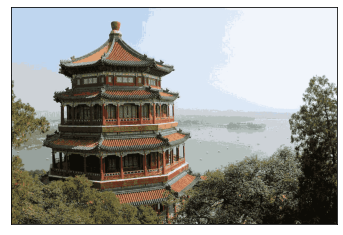

In [30]:
kmeans = KMeans(n_clusters=16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
china_recolored = new_colors.reshape(china.shape) #come back to original shape

ax = plt.axes(xticks = [], yticks = [])
ax.imshow(china_recolored);

<h4> Non-spherical shapes

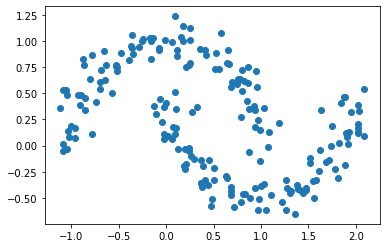

In [31]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=200, noise=.1, random_state=41)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

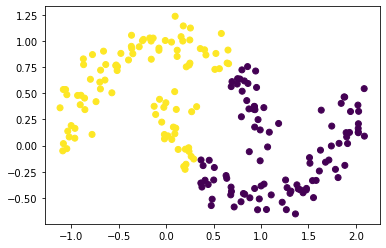

In [32]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X);
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)
plt.show() #not what we expect

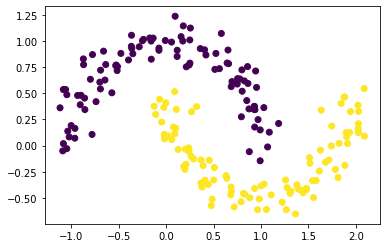

In [33]:
#DBSCAN 

from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.22, min_samples=1)
db.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=db.labels_)
plt.show()

<h4> Exercise1: Implement the mountain clustering algorithm. Apply to the following data.

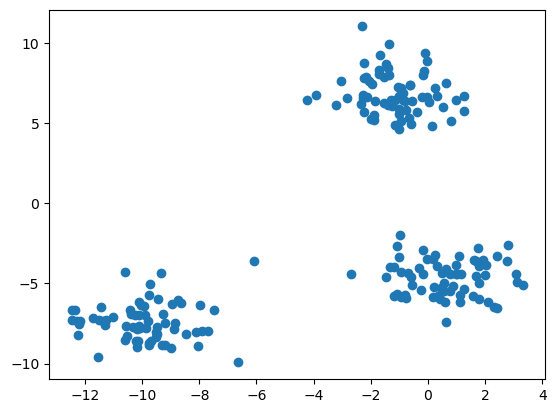

In [251]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=200, random_state=100, n_features=2, centers = 3, cluster_std = 1.2)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [346]:
import random
import numpy as np

centers = X[np.random.choice(X.shape[0], 3, replace=False), :]

centers

array([[-2.22962784,  8.78692272],
       [-0.36609687,  5.71548747],
       [-0.6131814 ,  7.41113437]])

In [348]:
from math import exp
from numpy import linalg as la

b = 1
sigma = 1

# g(c)
def g_f1(X, c):
    sum = 0
    for i in range(len(X)):
        sum += exp(-(la.norm(c-X[i])**(2*b))/(2*sigma**2))
    
    return sum

In [349]:
def g_f2(X, dict_g, c):
    max_g = -100
    for key, value in dict_g.items():
        if value > max_g:
            max_g = value
            c1 = key

    g_new = (dict_g[tuple(c)] - max_g) * exp(-(la.norm(c-c1)**(2*b))/(2*sigma**2))
    
    return g_new

In [350]:
# calculate g(c) for each center
g_c = []
for i in range(len(centers)):
    g = g_f1(X, centers[i])
    g_c.append(g)
    
dict_g = dict(zip([tuple(c) for c in centers], g_c))

# select the center with the highest g(c) value
c1 = max(dict_g, key=dict_g.get)
max_g = dict_g[c1]
  
max_iter = 10000
new_centers = centers

for iter in range(max_iter):   
       
    # calculate g_new(c) for each center
    g_new_c = []
    for i in range(len(new_centers)):
        g_new = g_f2(X, dict_g, new_centers[i])
        g_new_c.append(g_new)
    dict_g_new = dict(zip([tuple(c) for c in new_centers], g_new_c))
    
    # select the center with the highest g_new(c) value
    new_c = max(dict_g_new, key=dict_g_new.get)
    new_max_g = dict_g_new[new_c]
    
    # check if the algorithm converged
    #if new_max_g > max_g:
    new_centers = [new_c if np.array_equal(c, c1) else c for c in new_centers]
    new_centers = np.array(new_centers)
    #else:
    #   break 
    
new_centers_m = new_centers


[[-2.22962784  8.78692272]
 [-0.36609687  5.71548747]
 [-0.6131814   7.41113437]]


In [343]:
# clustering assignments for mountain algorithm
def assign_clusters_m(X, centers):
    
    assigned_clusters = np.zeros(X.shape[0], dtype=int)
    
    for i in range(X.shape[0]):
        point = X[i]
        
        # calculate the distances between point and centers
        distances = np.linalg.norm(centers - point, axis=1)
        
        # assign it to the closest cluster 
        assigned_clusters[i] = np.argmin(distances)
    
    return assigned_clusters


In [344]:
cluster_assignments_m = assign_clusters_m(X, new_centers_m)


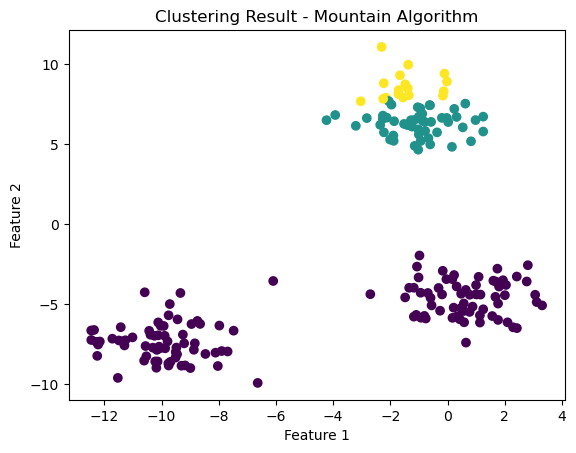

In [345]:
plt.scatter(X[:,0],X[:,1], c = cluster_assignments_m)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Result - Mountain Algorithm')

plt.show()

Text(0.5, 0.92, 'surface')

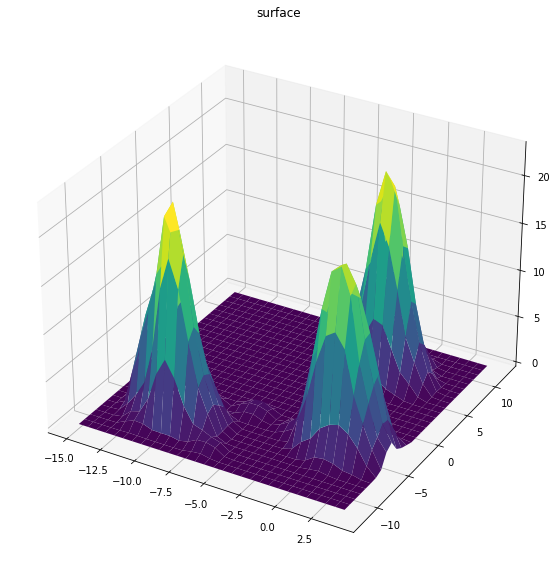

In [30]:
#data representation using density function

Text(0.5, 0.92, 'surface')

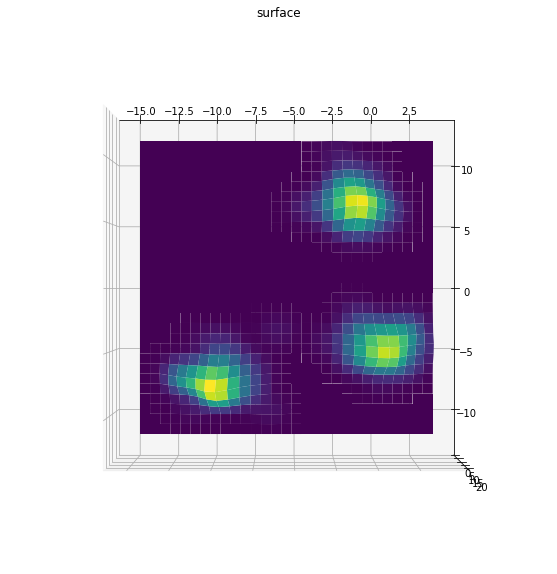

In [31]:
#view from the top

Text(0.5, 0.92, 'surface')

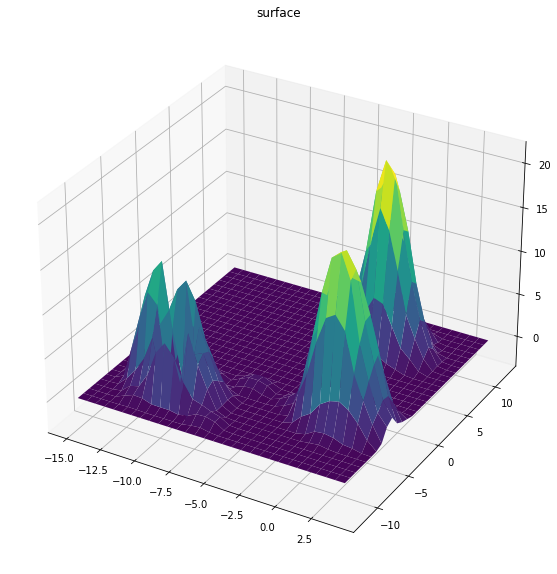

In [32]:
#locate the highest point --> this will be the first center; we cut these hill

Text(0.5, 0.92, 'surface')

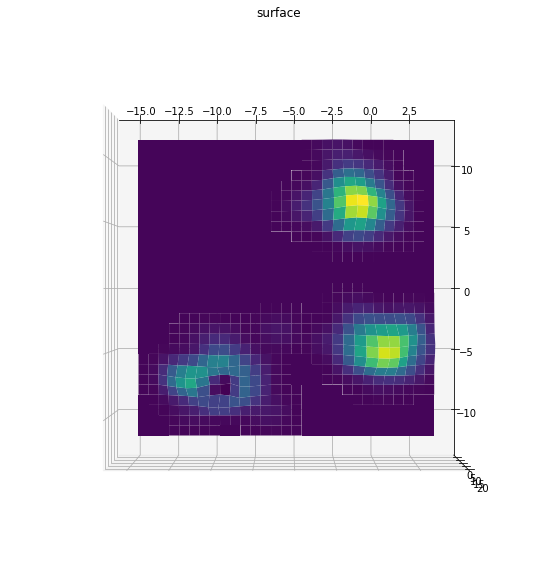

In [33]:
#view from the top

Text(0.5, 0.92, 'surface')

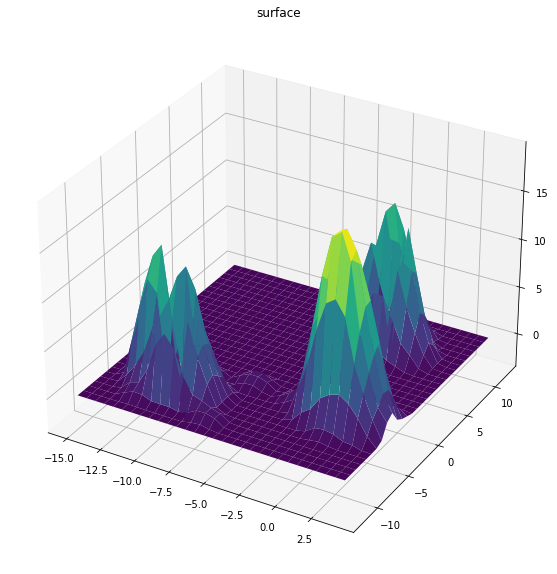

In [34]:
#similarly we are looking for the second center

Text(0.5, 0.92, 'surface')

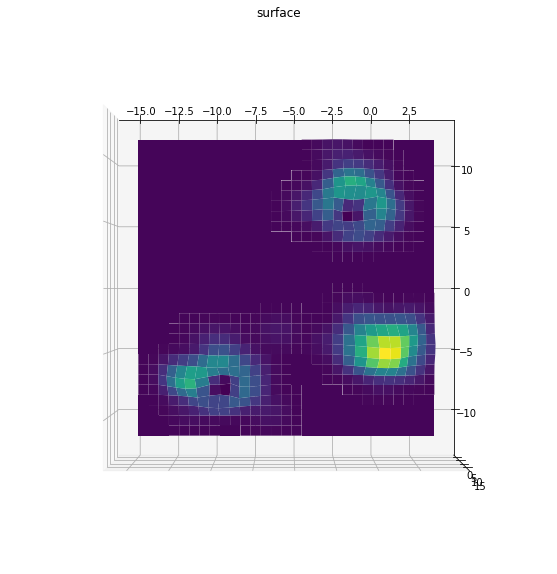

In [35]:
#view from the top

Text(0.5, 0.92, 'surface')

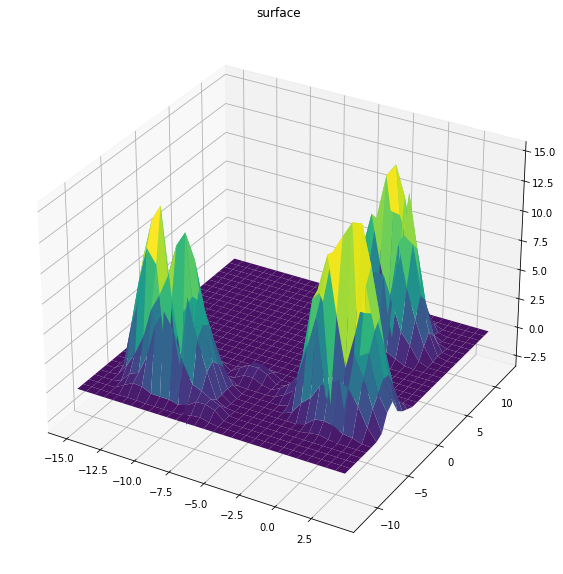

In [36]:
#we are looking for a third center

Text(0.5, 0.92, 'surface')

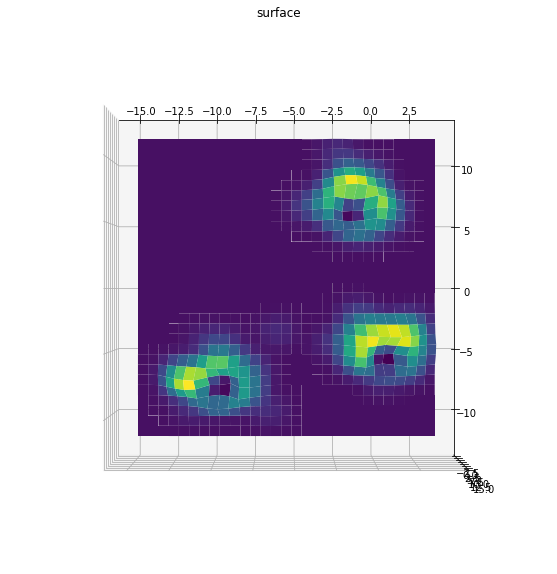

In [37]:
#view from the top --> we have all the centers

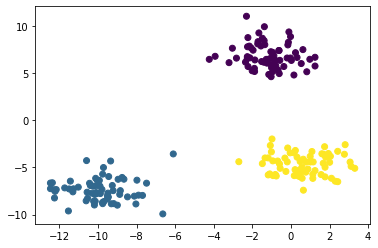

In [38]:
#we assign points to clusters

<h4> Exercise2: Implement the Gustafson-Kessel algorithm. Apply it to the data below - the algorithm should be able to handle the correct classification.

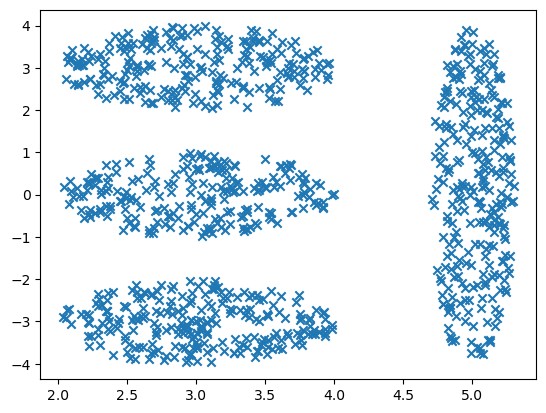

In [351]:
import numpy as np
import matplotlib.pyplot as plt

n = 10000
x = np.random.uniform(-6, 6, n)
y = np.random.uniform(-6, 6, n)

x1 = []
y1 = []
for i in range(n):
    if ((x[i]-5)**2)/0.3**2+((y[i]-0)**2)/4**2 <=1 or ((x[i]-3)**2)/1**2+((y[i]-3)**2)/1**2 <=1 or ((x[i]-3)**2)/1**2+((y[i]-0)**2)/1**2 <=1 or ((x[i]-3)**2)/1**2+((y[i]+3)**2)/1**2 <=1:
        x1.append(x[i])
        y1.append(y[i])
X = np.array([[x,y] for (x,y) in zip(x1,y1)])

plt.scatter(X[:,0],X[:,1], marker = "x")
plt.show()

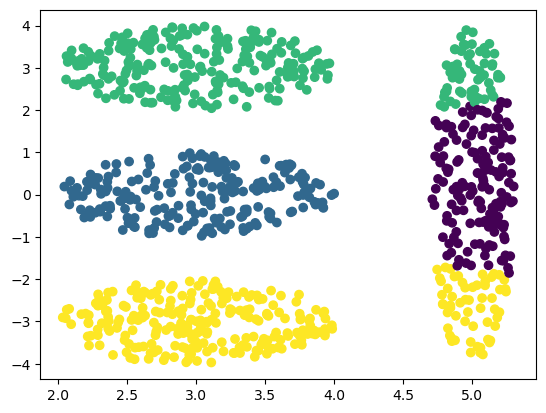

In [352]:
#for comparison, K-means, which has a problem with this type of data
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(X);
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)
plt.show() 

In [353]:
import numpy as np

# calculates distance between vector and center
def calculate_d(X, centers, i, j, A):
    xj = X[j]
    ci = centers[i]
    dist = np.sqrt(np.dot((xj - ci).T, np.dot(A, (xj - ci))))

    return dist


In [354]:
# calculates matrix of membership coefficients U
# considering the first A scaling matrix
def calculate_first_u(X, centers, K, A, m=2):
    U = np.empty((K,X.shape[0]),float)

    for i in range(U.shape[0]):
        for j in range(U.shape[1]):
            
            sum = 0
            for k in range(K):
                dist1 = calculate_d(X, centers, i, j, A)
                dist2 = calculate_d(X, centers, k, j, A)
                # set small non-zero value when finding zeros
                nom = np.where(dist1 == 0, 1e-10, dist1)  
                denom = np.where(dist2 == 0, 1e-10, dist2)  
                distances = nom/denom 
                sum += distances

            U[i][j] = 1/(sum**(2/(m-1)))
            
    return U
                

In [355]:
def update_center(X, U, i):
    num = 0
    denum = 0
    for j in range(len(X)):
        num += U[i][j]*X[j]
        denum += U[i][j]
        
    new_center = num/denum
    
    return new_center
        

In [356]:
# calculates covariance matrix S
def calculate_s(X, U, i, c, m=2):
 
    sum1 = np.zeros((X.shape[1], X.shape[1]))
    sum2 = 0.0
    for j in range(X.shape[1]):
        diff = (X[j] - c).reshape(-1, 1)
        sum1 += U[i][j]**2 * diff.dot(diff.T)
        sum2 += U[i][j]**2
    
    Si = sum1/sum2
    
    return Si


In [357]:
# updates A scaling matrix
def calculate_a(S, n):
    det = np.linalg.det(S)
    root = np.power(det, 1/n)
    inverted_S = np.linalg.inv(S)
    A = root*inverted_S
    
    return A


In [358]:
# updates U 
def calculate_u(X, centers, K, a_matrices, m=2):
    U = np.empty((K,X.shape[0]),float)

    for i in range(U.shape[0]):
        for j in range(U.shape[1]):
            
            sum = 0
            for k in range(K):
                # scoring matrix for this center
                A = a_matrices[k]
                
                dist1 = calculate_d(X, centers, i, j, A)
                dist2 = calculate_d(X, centers, k, j, A)
                # set small non-zero value when finding zeros
                nom = np.where(dist1 == 0, 1e-10, dist1)  
                denom = np.where(dist2 == 0, 1e-10, dist2)  
                distances = nom/denom 
                sum += distances

            U[i][j] = 1/(sum**(2/(m-1)))
            
    return U
                

In [359]:
def check_convergence(old_centers, new_centers, threshold):
    
    count = 0
    
    for i in range(len(old_centers)):
        c1 = old_centers[i]
        c2 = new_centers[i]
                
        if c1[0]-c2[0] <= threshold and c1[1]-c2[1] <= threshold:
            count +=1 
            
        if count == len(old_centers):
            return True
        
    return False

In [362]:
X = np.column_stack((x, y)) 
K = 4
centers = X[np.random.choice(X.shape[0], K, replace=False), :]
A = np.eye(X.shape[1])
U = calculate_first_u(X, centers, K, A)

max_iter = 10000
old_centers = centers
new_centers = np.zeros(centers.shape)
threshold = 0.001
a_matrices = []

for it in range(max_iter):  
 
    # update centers   
    for i in range(len(new_centers)):
        new_centers[i] = update_center(X, U, i)        
        
        # calculate S
        Si = calculate_s(X, U, i, new_centers[i])

        # update A
        Ai = calculate_a(Si, X.shape[0])
        a_matrices.append(Ai)
    
    # update U
    U = calculate_u(X, centers, K, a_matrices)
    a_matrices.clear()
    
    # check if the algorithm converged
    if check_convergence(old_centers, new_centers, threshold) == False:
        old_centers = new_centers
    else:
        break



In [363]:
# clustering assignments for gk
def assign_clusters(X, centers):
    assigned_clusters = np.zeros(X.shape[0], dtype=int)
    
    for i in range(X.shape[0]):
        point = X[i]
        
        # calculate the distances between point and centers
        distances = np.linalg.norm(centers - point, axis=1)
        
        # assign it to the closest cluster 
        assigned_clusters[i] = np.argmin(distances)
    
    return assigned_clusters



In [364]:
X = np.array([[x,y] for (x,y) in zip(x1,y1)])

cluster_assignments = assign_clusters(X, new_centers)


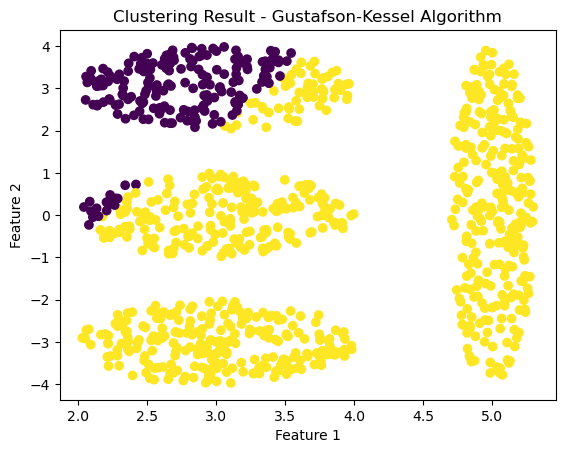

In [365]:
plt.scatter(X[:,0],X[:,1], c = cluster_assignments)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Result - Gustafson-Kessel Algorithm')

plt.show()

<h3> Supplementary material (hierarchical grouping)

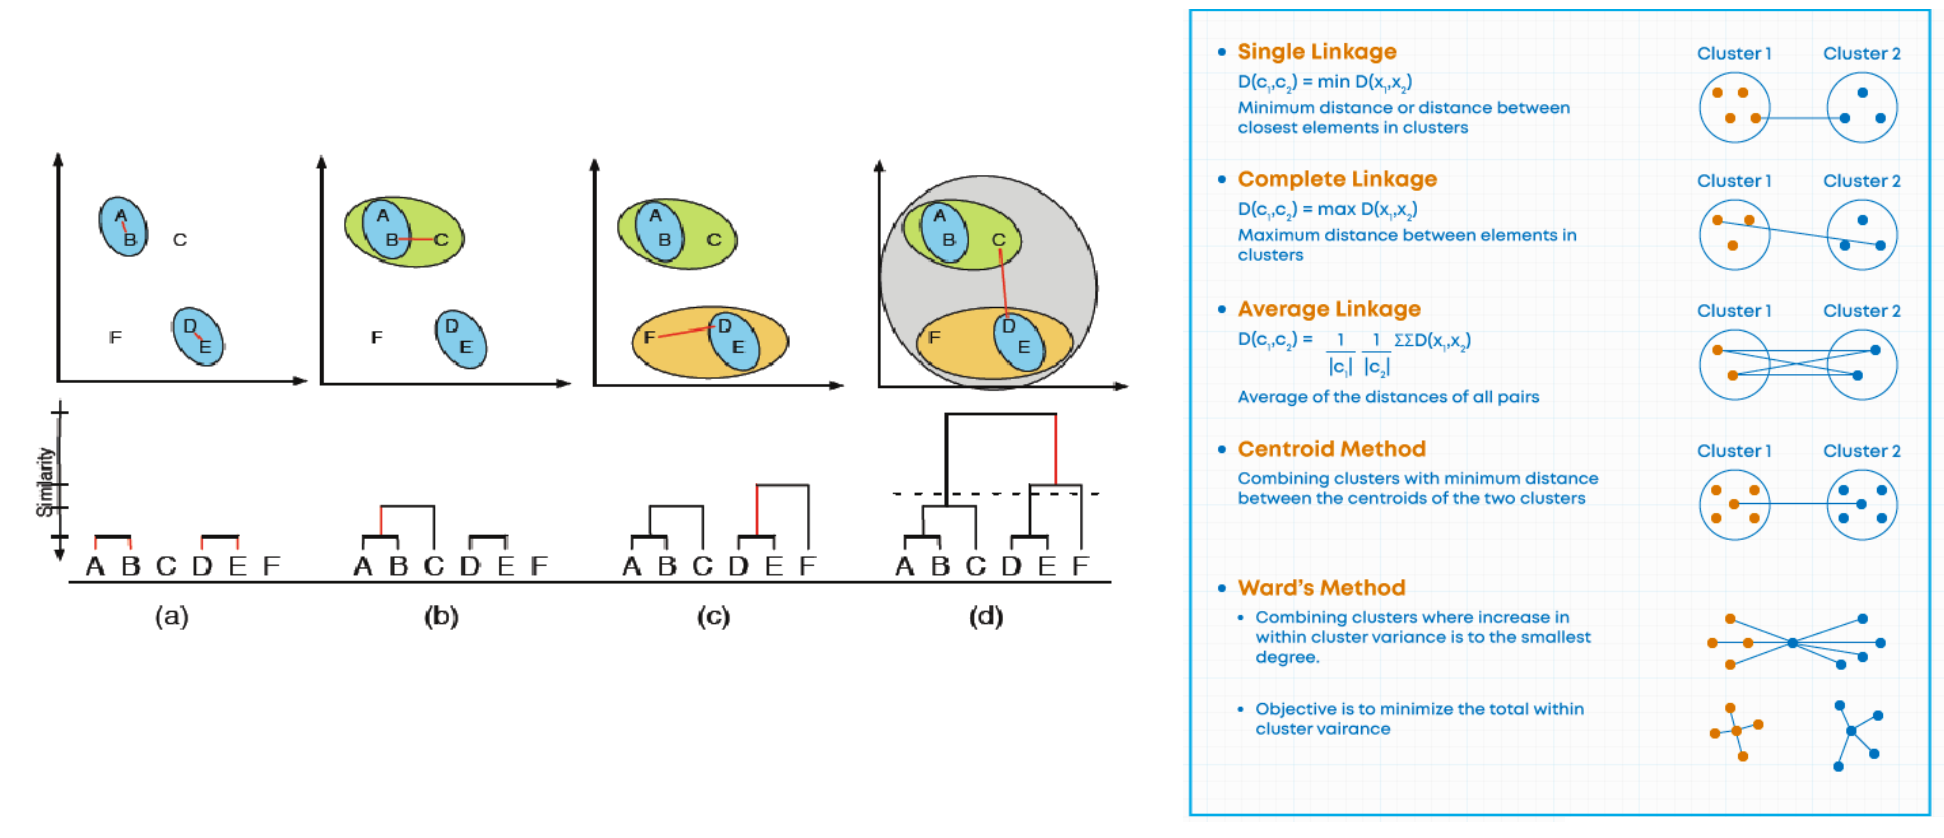

In [38]:
from IPython import display
display.Image("hg.png", width="1200", height="700")

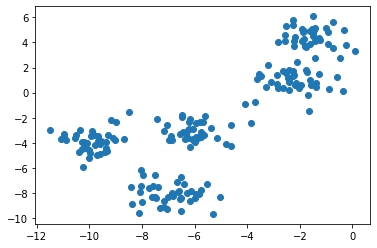

In [36]:
X, y = make_blobs(n_samples=200, random_state=1, n_features=2, centers = 5, cluster_std = 0.8)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

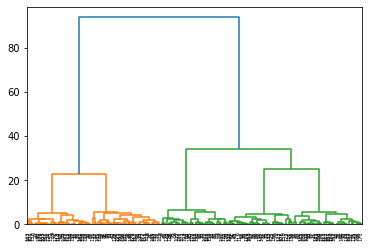

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(X, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

<h4> Exercise: What are the other variants for method and metric? Save appropriate formulas, test,and compare them.